In [97]:
from CoolProp.CoolProp import PropsSI
import numpy as np
PropsSI('P','D',990.4,"Q",0,"water")

PropsSI("Q","H",2412346.494647076,"P",2e7,"water")


1.0

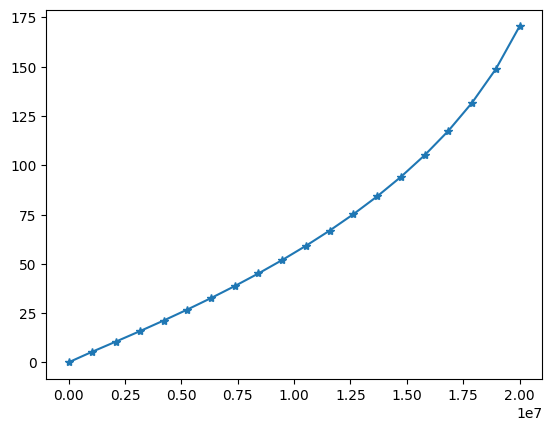

In [98]:
from scipy.linalg import solve

density=[]

pressure=np.linspace(700,2e7,num=20)

for i in pressure:
    density.append(PropsSI("D","P",i,'Q',1,'water'))

import matplotlib.pyplot as plt

plt.plot(pressure,density,marker='*')


/tmp/ipykernel_203626/1851049365.py:27: LinAlgWarning: Ill-conditioned matrix (rcond=8.57058e-45): result may not be accurate.
  s=solve(matrix,constant_vactor)


[-1.22315563e+00  6.31314898e-06 -2.55439625e-13  1.80971232e-20]


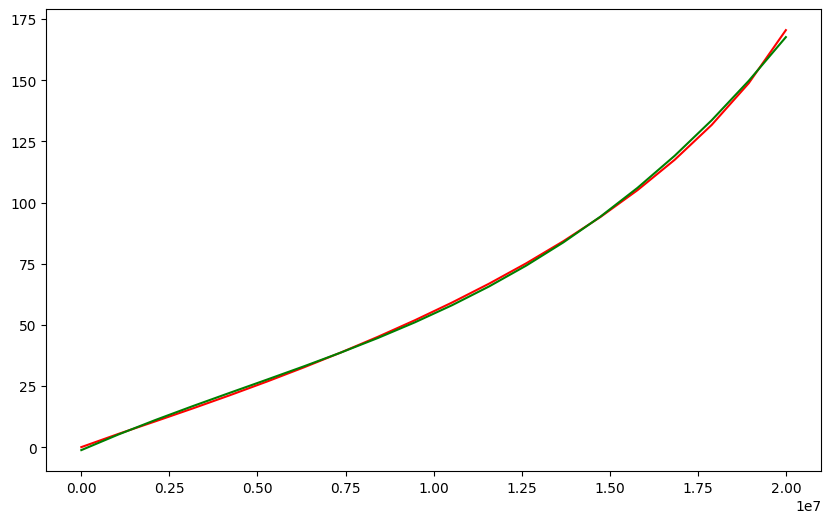

In [102]:
'''poynomial data fitting with coolprop'''

N=3
matrix=np.zeros(shape=(N+1,N+1))

x=np.array(pressure)
y=np.array(density)
for i in range (N+1):
    for j in range(N+1):
        
        x1=[]
        if i==0 and j==0:
            matrix[i][j]=len(x)
        else: 
            for k in range (len(x)):
                x1.append((x[k])**(i+j))
                
            matrix[i][j]=sum(x1)

constant_vactor=[]
for i in range(N+1):
    if i==0:
        constant_vactor.append(sum(y))
    else:
        constant_vactor.append(sum(x**i*y))
s=[]
s=solve(matrix,constant_vactor)

def prediction(s,x,N):
    s=np.array(s)
    values=[]
    for i in range ( N+1):
        values.append(x**i)
    values=np.array(values)

    return sum(s*values)
    

x_predict=[]
y_predict=[]

for i in pressure:
    x_predict.append(i)
    y_predict.append(prediction(s,i,N))



plt.figure(figsize=(10,6))
plt.plot(x,y,color="r")
plt.plot(x_predict,y_predict,color="green")


print(s)

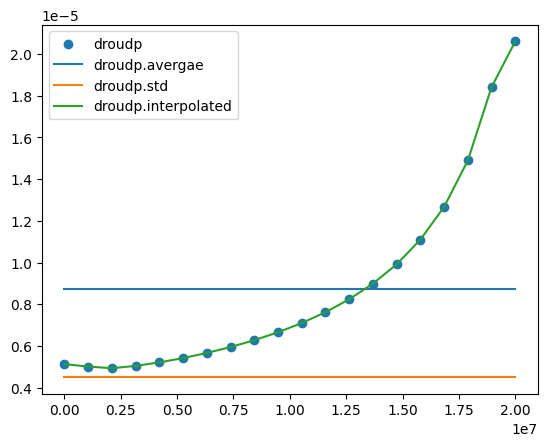

In [107]:
pressureGrad=np.gradient(pressure)
densityGrad=np.gradient(density)

k=densityGrad/pressureGrad

plt.scatter(pressure,k)
plt.plot(pressure,np.ones_like(pressure)*np.mean(k))
plt.plot(pressure,np.ones_like(pressure)*np.std(k))


from scipy.interpolate import interp1d

droudp=interp1d(pressure,k)
plt.plot(pressure,droudp(pressure))

plt.legend(['droudp','droudp.avergae','droudp.std','droudp.interpolated'])